In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Read record into dataframe
data = pd.read_csv('athlete_events.csv')
data.shape # (271116, 15)
# data.head()

# Only interested in predicting for Summer Olympics
data = data[data['Season'] == 'Summer']

In [23]:
# Read NOC Region csv to df
noc_regions = pd.read_csv('noc_regions.csv')
noc_regions.shape # (230, 3)
noc_regions.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [24]:
# Merge the two dataframes on NOC col
merged_data = data.merge(noc_regions, how='left', on='NOC')
merged_data.head()
merged_data.columns

filtered_merged_data = merged_data[merged_data['NOC'] == 'USA']
filtered_merged_data = filtered_merged_data['Team'].unique()
print(filtered_merged_data)

['United States' 'Vesper Boat Club' 'New York Athletic Club #2-4'
 'Mystery' 'Mound City Rowing Club-2' 'La Salle Turnverein, Chicago'
 'Gallant' 'United States-1' 'United States-2'
 "Christian Brothers' College-1" 'Passaic Turnverein, Passaic' 'Bingo'
 'Chicago Athletic Association-2' 'Widgeon'
 'Davenport Turngemeinde, Davenport' 'Norwegier Turnverein, Brooklyn'
 'Turnverein Vorwrts, Cleveland' 'New York Turnverein, New York'
 'Angelita' 'United States-10' 'St. Rose-2' 'New York Athletic Club-1'
 'St. Louis Southwest Turnverein #1-2' 'Chicago Archers' 'Rush IV'
 'Boston Archers' 'Western Rowing Club-3'
 'United States Golf Association-3' 'Trans-Mississippi Golf Association-2'
 'United States-3' 'New York Athletic Club-4' 'Complex II'
 'United States-9' 'Babe' 'Cincinnati Archers' 'United States-6'
 'Western Golf Association-1' 'New York Athletic Club #1-1'
 'United States-7' 'United States/France' 'Aphrodite'
 'Concordia Turnverein, St Louis' 'Century Boat Club-1'
 'St. Louis Amateur

In [25]:
# Find out the earliest and the latest year of the record
year_data = data['Year']
year_data.head()

max_year = year_data.max()
min_year = year_data.min()

distinct_year_list = year_data.unique().tolist()
distinct_year_list = sorted(distinct_year_list)
# print(f'max_year: {max_year}')
# print(f'min_year: {min_year}')
# print(f'total number of years: {max_year - min_year}')
# print(f'distinct_year_list: {distinct_year_list}')


In [26]:
# Find out the distinct values of medal
distinct_medals = data['Medal'].unique()
# print(distinct_medals)

In [53]:
# Get the total number of gold, for the USA for each year
# 01 - Note that for team event, there is 1 gold medal to each team member
# 02 - Therefore, we have to partition by year and event -> count each unique event as 1 gold
usa_gold_medals = merged_data[(merged_data['Team'] == 'United States') & (merged_data['Medal'] == 'Gold')]
usa_gold_medal_count = usa_gold_medals.groupby(by=['Year', 'Event']).size().reset_index(name='Gold Medals')
usa_gold_medal_count_per_year = usa_gold_medal_count.groupby('Year')['Gold Medals'].size().reset_index(name='Gold Medals')
usa_gold_medal_count_per_year = usa_gold_medal_count_per_year.sort_values(by='Year', ascending=False)
usa_gold_medal_count_per_year.head()

,Year,Gold Medals
27,2016,45
26,2012,43
25,2008,33
24,2004,35
23,2000,35


In [52]:
# Get the total number of gold, for China for each year
china_gold_medals = merged_data[(merged_data['Team'] == 'China') & (merged_data['Medal'] == 'Gold')]
china_gold_medal_count = china_gold_medals.groupby(by=['Year', 'Event']).size().reset_index(name='Gold Medals')
china_gold_medal_count_per_year = china_gold_medal_count.groupby('Year')['Gold Medals'].size().reset_index(name='Gold Medals')
china_gold_medal_count_per_year = china_gold_medal_count_per_year.sort_values(by='Year', ascending=False)
china_gold_medal_count_per_year.head()

,Year,Gold Medals
8,2016,25
7,2012,35
6,2008,50
5,2004,27
4,2000,24


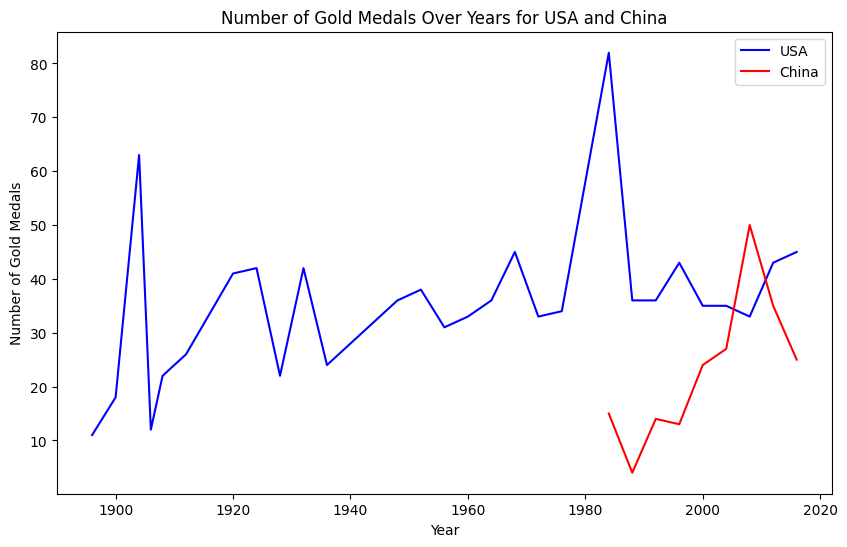

In [57]:
# Plot the existing data for visualization 
plt.figure(figsize=(10, 6))

plt.plot(usa_gold_medal_count_per_year['Year'], usa_gold_medal_count_per_year['Gold Medals'], color='blue', label='USA')
plt.plot(china_gold_medal_count_per_year['Year'], china_gold_medal_count_per_year['Gold Medals'], color='red', label='China')

plt.xlabel('Year')
plt.ylabel('Number of Gold Medals')
plt.title('Number of Gold Medals Over Years for USA and China')
plt.legend()
plt.grid(True)
plt.show()

In [46]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Prepare the data for USA
X_usa = usa_gold_medal_count_per_year[['Year']].values
y_usa = usa_gold_medal_count_per_year['Gold Medals'].values

# Prepare data for China
X_china = china_gold_medal_count_per_year[['Year']].values
y_china = china_gold_medal_count_per_year['Gold Medals'].values 

In [47]:
# Initialize the linear regression model
linear_regression_model_usa = LinearRegression().fit(X_usa, y_usa)
linear_regression_model_china = LinearRegression().fit(X_china, y_china)

In [56]:
# Define future range of years for prediction
future_years = np.arange(2017, 2100).reshape(-1, 1)

# Make predictions
usa_predictions = linear_regression_model_usa.predict(future_years)
china_predictions = linear_regression_model_china.predict(future_years)

# Create dataframes for future predictions
future_usa_df = pd.DataFrame({'Year': future_years.flatten(), 'Predicted Gold Medals (USA)': usa_predictions})
future_china_df = pd.DataFrame({'Year': future_years.flatten(), 'Predicted Gold Medals (China)': china_predictions})

future_usa_df.head()
future_china_df.head()

,Year,Predicted Gold Medals (China)
0,2017,38.5125
1,2018,39.4250
2,2019,40.3375
3,2020,41.2500
4,2021,42.1625


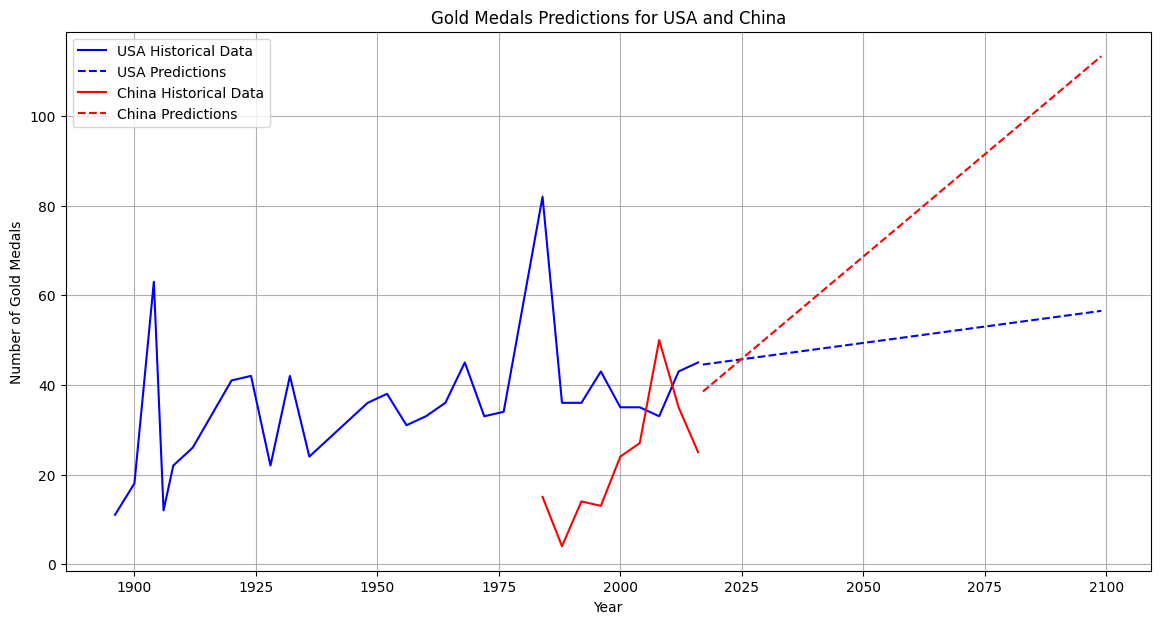

In [51]:
import matplotlib.pyplot as plt

# Plot historical data and predictions for USA
plt.figure(figsize=(14, 7))

plt.plot(usa_gold_medal_count_per_year['Year'], usa_gold_medal_count_per_year['Gold Medals'], color='blue', label='USA Historical Data')
plt.plot(future_usa_df['Year'], future_usa_df['Predicted Gold Medals (USA)'], color='blue', linestyle='--', label='USA Predictions')

# Plot historical data and predictions for China
plt.plot(china_gold_medal_count_per_year['Year'], china_gold_medal_count_per_year['Gold Medals'], color='red', label='China Historical Data')
plt.plot(future_china_df['Year'], future_china_df['Predicted Gold Medals (China)'], color='red', linestyle='--', label='China Predictions')

plt.xlabel('Year')
plt.ylabel('Number of Gold Medals')
plt.title('Gold Medals Predictions for USA and China')
plt.legend()
plt.grid(True)
plt.show()
